# chapter 4: Intrinsic geometry of surfaces

Anything that can be defined via the first fundamental form (metric tensor) is intrinsic geometry).


## Isometry

A diffeomorphism $\phi: S \to \overline S$ is an isometry iff for all $p \in S$ and $t_1, t_2 \in T_p S$, we have that $\langle t_1, t_2 \rangle_p = \langle d\phi_p (t_1), d\phi_p (t_2) \rangle_{\phi(p)}$.

#### Isometry preserves inner products / 1st fundamental form

By definition, and isometry preserves inner products / 1st fundamental form.

#### Isometry preserves lengths

Length is square root of inner product of vector with itself. Since isometry preserves inner products, it also preserves length.



**Local Isometry**

A map $\phi: V \subseteq S \to \overline S$ of a nbhd $p \in V \subseteq S$ is a local isometry at $p$ iff there is a nbhd $\phi(p)  in \overline V \subseteq \overline S$ such that $\phi: V \to \overline V$ is an isometry. 

If there is a local isometry for each $p \in V$, then $S$ is locally isometric to $\overline S$ and $\overline S$ is locally isometric to $S$. 

If $\phi: S \to \overline S$ is a diffeo and is a local isometry for each point, then $S$ is globally isometric to $\overline S$. On the other hand, two surfaces can be locally isometric without being globally isometric.

-----

**Example 1:**


- Let $C \equiv [0, 2 \pi] \times \mathbb R$ be the cylinder. Let $\alpha: C \to \mathbb R^3$, $\alpha(\theta, h) \equiv (\cos \theta, \sin \theta, h)$ be the embedding of a cylinder in $\mathbb R^3$.
- Let $P \equiv \mathbb R^2$ stand for the 2-plane. The embedding for a plane in $\mathbb R^3$ passing through a basepoint $p_0 \in \mathbb R^3$ spanned by two directions $d_1, d_2 \in \mathbb R^3$ is given by $\beta: P \to \mathbb R^3$, $\beta(u, v) \equiv p_0 + u d_1 + v d_2$.
- Define a map $\phi: \mathbb R^3 \to \mathbb R^3$, $\phi(x) \equiv \beta \circ \alpha^{-1}(x)$ be the map which sends a point on the cylinder to a point on the plane. (Sid note: this seems too convoluted. Why not just say "send a point $(\cos \theta, \sin \theta, h)$ on the cylinder to $(\theta, h, 0)$ in $\mathbb R^3$"?)
- TODO, this is too stuck in a thicket of notation

**Example 2: General phenomena**
- Let $k: U \to S$, $l: U \to T$ be two parametrizations such that $E_k = E_l$, $F_k = F_k$ and $G_k = G_l$. (ie: equal first fundamental forms). Then we claim the map $f: l \circ k^{-1}: S \to T$ is a local isometry between $S$ and $T$. 
- **Proof**
- Write any tangent as tangent to a curve $\alpha \equiv (\alpha_u, \alpha_v): I \to U$. 
- This means that $(k \circ \alpha)'(0)$ is the tangent to the curve at $S$.
- Pushing this forward to see what happens at $T$, we need to multiply by the jacobian of $f$. This gives us $f' (k \circ \alpha)'(0)$ which is $(f \circ k \circ \alpha)'(0)$, which is $(l \circ k^{-1} \circ k \circ \alpha)'(0)$, which is (finally) $(l \circ \alpha)'(0)$. 
- This means that the tangent vectors on $S$ and $T$ are equal, so they have equal first fundamental forms, since the first fundamental form is just the dot product of tangent vectors.
- Thus, we preserve the local inner product structure.

**Example 3: Catenoid versus helicoid**
- catenary: $x = a \sinh v, z = a v$. (ie, the plot of $(v, \sinh v)$), where $a$ is a scale parameter).
- surface of revolution of curve $(c(v), v)$ is given by $(c(v) \cos u, c(v) \sin u, v)$.
- catenoid: surface of revolution of catenary. Given by $\vec x(u, v) = (a \sinh v \cos u, a \sinh v \sin u, av)$. 
- helicoid: through each point of the helix, draw a line parallel to xy plane, intersecting z axis. This makes it a _ruled surface_. It's given by the parametrization $\vec x(u, v) \equiv (v \cos u, v \sin u, a u)$. 

In [100]:
from sympy import *
from sympy.vector import *
import sympy.plotting
from sympy.plotting import *
%matplotlib inline

init_printing() 

In [143]:
(u, v) = symbols("u v", real=True)
print(u, v)

u v


⎡cos(u)⋅cosh(v)⎤
⎢              ⎥
⎢sin(u)⋅cosh(v)⎥
⎢              ⎥
⎣      v       ⎦


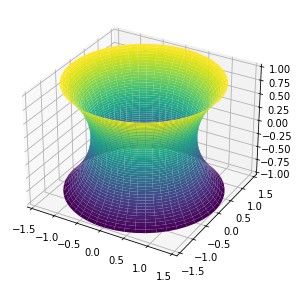

In [144]:
catenoid = Matrix([cosh(v) * cos(u), cosh(v) * sin(u), v])
pretty_print(catenoid)
plotting.plot3d_parametric_surface(catenoid[0], catenoid[1], catenoid[2], (u, 0,  2 * pi), (v, -1, 1))

In [145]:
catenoid_u = catenoid.diff(u); catenoid_v = catenoid.diff(v);
pretty_print((catenoid_u, catenoid_v))

⎛⎡-sin(u)⋅cosh(v)⎤  ⎡cos(u)⋅sinh(v)⎤⎞
⎜⎢               ⎥  ⎢              ⎥⎟
⎜⎢cos(u)⋅cosh(v) ⎥, ⎢sin(u)⋅sinh(v)⎥⎟
⎜⎢               ⎥  ⎢              ⎥⎟
⎝⎣       0       ⎦  ⎣      1       ⎦⎠


In [146]:
catenoid_E = simplify(catenoid_u.dot(catenoid_u)); 
catenoid_F = simplify(catenoid_u.dot(catenoid_v));
catenoid_G = simplify(catenoid_v.dot(catenoid_v));
print(catenoid_E)
print(catenoid_F)
print(catenoid_G)

cosh(v)**2
0
cosh(v)**2


⎡cos(u)⋅sinh(v)⎤
⎢              ⎥
⎢sin(u)⋅sinh(v)⎥
⎢              ⎥
⎣      u       ⎦


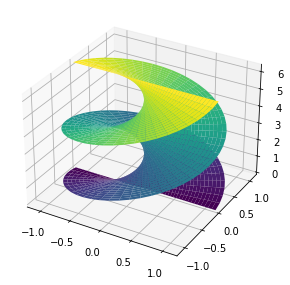

In [147]:
vhelix = sinh(v); # re-parametrization
helicoid = Matrix([vhelix * cos(u), vhelix * sin(u), u])
pretty_print(helicoid)
plotting.plot3d_parametric_surface(helicoid[0], helicoid[1], helicoid[2], (u, 0,  2 * pi), (v, -1, 1))

In [148]:
helicoid_u = helicoid.diff(u); helicoid_v = helicoid.diff(v)
pretty_print((helicoid_u, helicoid_v))


⎛⎡-sin(u)⋅sinh(v)⎤  ⎡cos(u)⋅cosh(v)⎤⎞
⎜⎢               ⎥  ⎢              ⎥⎟
⎜⎢cos(u)⋅sinh(v) ⎥, ⎢sin(u)⋅cosh(v)⎥⎟
⎜⎢               ⎥  ⎢              ⎥⎟
⎝⎣       1       ⎦  ⎣      0       ⎦⎠


In [149]:
helicoid_E = simplify(helicoid_u.dot(helicoid_u))
helicoid_F = simplify(helicoid_u.dot(helicoid_v))
helicoid_G = simplify(helicoid_v.dot(helicoid_v))
print(helicoid_E)
print(helicoid_F)
print(helicoid_G)

cosh(v)**2
0
cosh(v)**2


In [150]:
print(helicoid_E == catenoid_E)
print(helicoid_F == catenoid_F)
print(helicoid_G == catenoid_G)

True
True
True


**Example 3: One sheeted cone versus plane**

⎡     u      ⎤
⎢            ⎥
⎢     v      ⎥
⎢            ⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎣╲╱  u  + v  ⎦


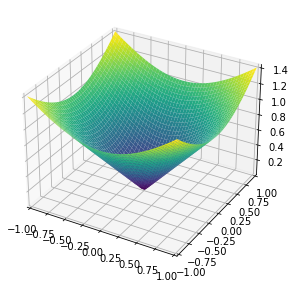

In [151]:
cone = Matrix([u, v, sqrt(u*u + v*v)])
pretty_print(cone) # actually we discard the vertex (0, 0)
plotting.plot3d_parametric_surface(cone[0], cone[1], cone[2], (u, -1,  1), (v, -1, 1))

In [152]:
alpha = acot(1)
print(alpha)
sin_alpha = sin(alpha)
cos_alpha = cos(alpha)
print(sin_alpha)

pi/4
sqrt(2)/2


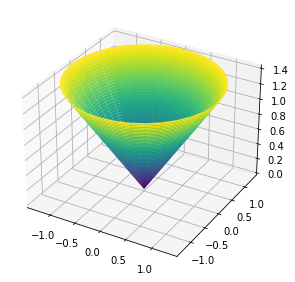

In [153]:
r = u; t = v; # rho, theta
F = Matrix([r * sin_alpha * cos(t / sin_alpha), r * sin_alpha * sin(t / sin_alpha), r * cos_alpha])
plotting.plot3d_parametric_surface(F[0], F[1], F[2], (r, 0,  2), (t, 0, 2*pi))

In [154]:
F_J = F.jacobian((r, t))
pretty_print(F_J)

⎡√2⋅cos(√2⋅v)              ⎤
⎢────────────  -u⋅sin(√2⋅v)⎥
⎢     2                    ⎥
⎢                          ⎥
⎢√2⋅sin(√2⋅v)              ⎥
⎢────────────  u⋅cos(√2⋅v) ⎥
⎢     2                    ⎥
⎢                          ⎥
⎢     √2                   ⎥
⎢     ──            0      ⎥
⎣     2                    ⎦


In [155]:
print(F_J.rank()) # has rank 2, is one-one since domain has 2 degrees of freedom. 

2


In [157]:
F_cone_0 = F[0]; F_cone_1 = F[1];
F_cone_2 = simplify(sqrt(F_cone_0 * F_cone_0 + F_cone_1 * F_cone_1));
pretty_print((F_cone_2, F[2]))

pretty_print(F_cone_2 == F[2]) # check if F always lies on the cone. it does

⎛√2⋅│u│  √2⋅u⎞
⎜──────, ────⎟
⎝  2      2  ⎠
False


**Conformal Maps**

A diffeomorphism $\phi: S \to T$ is a **conformal map** iff for all $p \in S$ and all $v_1, v_2 \in T_p S$, we have that

$$\langle d\phi_p(v_1), d\phi_p(v_2) \rangle_{\phi(p)} = \lambda^2(p)\langle v_1, v_2 \rangle_p$$

Where $\lambda: S \to \mathbb R$ is a nowhere zero, differentiable function. (We take square to show clearly that is's everywhere positive)

TODO stuffs here

# Gauss theorem and the equations of compatibility


- In analogy with the frenet frame, to each point on a surface, we associate a frame, and we study the derivatives of these frame basis vectors.  We have a basis of $\{ x_u, x_v, N \}$. Let's differentiate this basis wrt the other basis vectors.


$$
x_{uu} = \Gamma^u_{uu} x_u + \Gamma^v_{uu} x_v + L_{uu} N \\
x_{uv} =  \Gamma^u_{uv} x_u + \Gamma^v_{uv} x_v + L_{uv} N\\
x_{vu} = \Gamma^u_{vu} x_u + \Gamma^v_{vu} x_v +  L_{vu} N \\
x_{vv} = \Gamma^u_{vv} x_u + \Gamma^v_{vv} x_v +  L_{vv} N  \\
N_u = a_u^u x_u + a_u^v x_v \\
N_v = a_v^u x_u + a_v^v x_v \\
$$


We have already obtained $a^i_j$ (TODO)

Recall that:
$$
E = x_u \cdot x_u \\
F = x_u \cdot x_v \\
G = x_v \cdot x_v 
$$

And let's compute:

$$
\partial_u (x_u \cdot x_u) = \partial_u E \\
x_{uu} \cdot x_u + x_u \cdot x_{uu} = \partial_u E \\
2 x_{uu} \cdot x_u = \partial_u E \\
2 x_{uu} \cdot x_u = E_u \\
x_{uu} \cdot x_u = E_u/2 \\
$$
We take inner products with $x_u$ to get:

$$
x_{uu} \cdot x_u = \Gamma^u_{uu} x_u \cdot x_u + \Gamma^v_{uu} x_v \cdot x_v  \\
E_u/2 = \Gamma^u_{uu} E + \Gamma^v_{uu} x_v F
$$

## Theorem Egregium: Gaussian curvature $K$ of a surface is invariant under local isometries. 

- gaussian curvature is determinant of shape operator.
- Alternatively, gaussian curvature is product of principal curvatures.
- We can express gaussian curvature in terms of christoffel symbols.
- Christoffel symbols can be computed in terms of $E, F, G$ which depend purely on inner products.
- This means that if we preserve local inner products, we preserve $E, F, G$, which preserves christoffel symbols, which preserves gaussian curvature!

#### Curvature in terms of Christoffel equations

- Recall the Gauss map: $N: S \to \texttt{2-sphere}$; $N(p)$ is the normal vector to the surface at $p$ (interpreted as a point on the sphere).
- In formulas, this is given by $N \equiv (x_u \wedge x_v) / |x_u \wedge x_v|$
- The Weingarten map / differential of the gauss map $dN: T_p S \to T_{N(p)}(\texttt{2-sphere})$ tells us the rate of change of the normal vectors in a given direction on $S$. 
- The tangent space $T_{N(p)}(\texttt{2-sphere})$ is parallel to the tangent space $T_p S$. This lets us interpret the Weingarten map as a map $dN: T_p S \to T_p S$.
- We wish to compute $dN: T_p S \to T_{N(p)}(\texttt{2-sphere})$. We express these as:
- $dN(u) = a_{uu} x_u + a_{uv} x_v$.
- $dN(v) = a_{vu} x_u + a_{vv} x_v$.
- Now define the second fundamental form: $II_p: T_p S \to \mathbb R$. $II_p(t) \equiv - \langle dN_p(t), t \rangle$
- As it is a quadratic form, we express $II((u, v)) \equiv \begin{bmatrix}u &v \end{bmatrix} \begin{bmatrix} L & M \\ M & N \end{bmatrix} \begin{bmatrix} u \\ v \end{bmatrix}$.
- We claim that In components, we have $L \equiv x_{uu} \cdot \hat n$, $M \equiv x_{uv} \cdot \hat n$, $N \equiv x_{vv} \hat n$.


#### Computing components of second fundamental form
- We begin by meditating on the second derivative components $x_{uu}, x_{uv}, x_{vv}$.
- Their rates of change along the tangent plane is given by the christoffel symbols: $\Gamma_{ab}^c \equiv x_{ab} \cdot x_c$
- What about their rates of change along the normals? That is, what about $x_{uu} \cdot N$, $x_{uv} \cdot N$, and $x_{vv} \cdot N$?
- Start with the eqn $N \cdot x_u = 0$, which is true because $N$ is normal to the tangent plane by defn. The tangent plane is spanned by $x_u, x_v$. 
- Differentiating, we find $(N \cdot x_u)_u = 0$, or $N_u \cdot x_u + N \cdot x_{uu} = 0$. This means that $- N_u \cdot x_u = N \cdot x_{uu}$.
- This takes the geometric expresion $N \cdot x_{uu}$, and re-expresses it as $- N_u \cdot x_u$.
- Can we do this for the other second derivtives $x_{uv} \cdot N, x_{vv} \cdot N$? Let's try!
- Continuing, we have $(N \cdot x_u)_v = 0$. This gives $N_v \cdot x_u + N \cdot x_{uv} = 0$,
  or that $-N_v \cdot x_u = N \cdot x_{uv}$.
- The second relation we have for $N$ is  $N \cdot x_v = 0$.
- Differentiating wrt $u$, we have $(N \cdot x_v)_u = 0$, or $N_u \cdot x_v + N \cdot x_{vu} = 0$. That is, $-N_u \cdot x_v = N \cdot x_{vu}$.
- Differentiating wrt $v$, we have $(N \cdot x_v)_v = 0$, or $N_v \cdot x_v + N \cdot x_{vv} = 0$. That is, $-N_v \cdot x_v = N \cdot x_{vv}$.
- This "motivates" our definition of $II_p(t) \equiv - \langle dN_p(t), t \rangle$.

#### Geometric meaning of $II$: Normal curvature of a curve / tangent vector
- https://www.math.miami.edu/~galloway/dgnotes/chpt5.pdf
- For a curve $\alpha$, define the *normal curvature* ($\kappa_n$) at $p = \alpha(0)$ to be the component of $\alpha''$ along $N$. (Recall that $\alpha'$ can only line on $T_p S$, and thus has zero component along $N$).
- This gives $\kappa_n \equiv \alpha'' \cdot N$.
- **Theorem**: Let $t \in T_p S$ be a tangent vector represented by the curve $\alpha: I \to S$. That is, $\alpha(0) = p$, $\alpha'(0) = t$. Then we claim that the normal curvature of $\alpha$, which is $\kappa_n \equiv \alpha''(p) \cdot N(p)$ is equal to $II_p(t) = -\langle dN(t), t \rangle$ .
- **Proof 1**:
- Start with the relation $\alpha'(i) \cdot (N(\alpha(i)) = 0$, since by definition $N$ will be perpendicular to the tangent plane at $T_{\alpha(i)} S$, while $\alpha'(i)$ lives on the tangent plane.
- Differentiate with respect to $i$ to get $\alpha''(i) \cdot N(\alpha(i)) + \alpha'(i) \cdot \alpha'(t) \cdot dN(\alpha'(i)) = 0$. This is because of chain rule. $d(N \circ \alpha) = dN \circ d\alpha$.
- This gives us $\kappa_n = -t \cdot dN(t)$, by substituting $\alpha''(i) \cdot N(\alpha(i)) = \kappa_n$, and $t = \alpha'(i)$.
- That's exactly the second fundamental form on the RHS, so we have $\kappa_n = II_p(\alpha(i))$.

# 4.4: Parallel transport and Geodesics

## Covariant derivative
- Projection of the regular derivative to the tangent plane.  
- Will denote this operator by $Df/dt$ or some such, where we are taking the derivative along a curve $\sigma: I \to S$ of a vector field $X: S \to TS$. That is, we consider slices of $X$ along $\sigma$: $D(X \circ \sigma)(t)/dt$ 
- A vector field $W$ along a curve $\alpha: I \to S$ is said to be parallel if $Dw/dt = 0$ for every $t \in I$.

#### Parallel vector fields have constant inner product
- Let $V, W$ be parallel vector fields along the same curve $\alpha: I \to S$.
- Then we will have $\langle V(t), W(t) \rangle$ constant.
- **Proof**:
- If vector fields are parallel, then we will have that the rate of change of the vector field will be entirely along the normal.
- This means that $\langle V(t), W'(t) \rangle = 0$. Similarly, $\langle V'(t), W(t) \rangle = 0$.
- This means that $d(\langle V(t), W(t) \rangle) = \langle V(t), W'(t) \rangle +  \langle V'(t), W(t) \rangle = 0 + 0 = 0$.
- Thus, the inner product never changes.

##### Parallel vector field has constant length
- Since $V, V$ are parallel vector fields, we have that $D(\langle V(t), V(t) \rangle) = 0 = ||V(t)||^2$.
- This means that $||V(t)|| = \texttt{const}$.

#### geodesics (parametric curve)
- A curve $\alpha: I \to S$ is a geodesic iff $D \alpha'(t) /dt = 0$. 
- From the previous theorem, we know that $||\alpha'(t)||$ is constant.



#### geodesics (regular connected curve)
- A regular connected curve $C$ in $S$ is said to be a geodesic if for each $p \in C$, the parametrization $\alpha(s)$ of a coordinate nbhd of $p \in C$ by the arclength $s$ gives a parametrized geodesic. That is, $\alpha'(s)$ is a parallel vector field along $\alpha(s)$. [What does it mean to be _along_ $\alpha(s)$?]

- From an exterior point of view, this says that $\alpha''(s) = \kappa n$ is normal to the tangent plane (ie, parallel to the surface normal). 
- In other words, a regular curve is a geodesic iff at each point $p \in C$, its [principal normal](https://web.mit.edu/hyperbook/Patrikalakis-Maekawa-Cho/node23.html) at $p$ is parallel to the surface normal at $p$.

#### Algebraic value of the covariant derivative

Let $w$ be a differentiable field of unit vectors along a parametrized curve $\alpha: I \to S$ on an oriented surface $S$. Since $w(t)$, $t \in I$ is a unit vector field, $dw/dt$ is normal to $w(t)$ (via the usual proof $\langle w(t), w(t) \rangle = 1 \implies 2 \langle w(t), w'(t) \rangle = 0$). 

- Therefore, $dw/dt$ is perpendicular to $w$. Since the covariant derivative $Dw/dt$ is the projection of $dw/dt$ onto the tangent plane, this means that $Dw/dt$ is also perpendicular to $w$.
- Further, The covariant derivative $Dw/dt$ is, by definition, only along the tangent plane $T_p S$, and will thus be perpendicular to the surface normal $N_p$.
- Putting the two facts together, $Dw/dt$ must be along $w \times N$. 
- Thus, we say that $Dw/dt = \lambda (N \times w(t))$ (Do carmo writes $N \wedge w(t)$ instead of writing $N \times w(t)$).
- The real number $\lambda = \lambda(t)$, denoted by $[Dw/dt]$ is called as the **algebraic value of the covariant derivative of $w$ at $t$.
- See that the sign of $[Dw/dt]$ depends on the orientation of $S$.
- We can also say that $Dw/dt = \langle dw/dt, N \times w \rangle$ (since $N \times w$ will be on the tangent plane, which has all the components of $dw/dt$, and furthermore is along $w$, which also has all the components of $dw/dt$.)


# Geodesic curvature

> TODO, I don't care about it immediately.
> TODO, damn, I do, to define gauss bonnet

Let $C$ be an oriented regular curve contained on an oriented surface $S$. Let $\alpha(s)$ be a parametrization of $C$ in a nbhd of $p \in S$, by arc-length $s$.  The algebraic value of the covariant derivative $[D\alpha'(s)/ds] = k_g$ of $\alpha'(s)$ at $p$ is called the **geodesic curvature** of $C$ at $p$.
- Intuitively, this writes the projection of $\alpha''(s)$ into the tangent plane as the component along $N \times \alpha'(s)$.  $\alpha''(s)$ only has component perpendicular to $\alpha'(s)$ due to the usual length argument ($\langle \alpha'(s), \alpha'(s) \rangle = 1 \implies 2 \langle \alpha''(s), \alpha'(s)= 0$ ). We consider component perpendicular to $N$ since we want covariant derivative, which is by definition component in the tangent plane, and is thus component perpendicular to $N$. Thus, putting these two together, it suffices to consider the component along $\alpha'(s) \times N$, which is exactly $[D\alpha'(s)/ds]$. 
- We can also think of this quantity $k_g$ of $C$ at $p$ as the norm of $\alpha''(s)$, since $\alpha''(s)$ only has component along $N \times \alpha'(s)$. 
- Geodeics are curves which have component $\alpha''(s)$ fully along $N$. This means that **a curve $C$ is a geodesic iff it has geodesic curvature zero.**.
- Recall the **normal curvature** of a curve $\alpha(s)$: It is the component of the curvature $\alpha''(s)$ along the normal $N$. That is, it is $\langle \alpha''(s), N(\alpha(s)) \rangle$. This can also be expressed as $\langle \alpha'(s), dN (\alpha'(s)) \rangle$, which is the second fundamental form.
- This means that the total curvature $\kappa$ of a curve is decomposed into two orthogonal parts: the geodesic curvature $\kappa_g$ and the normal curvature $\kappa_n$. Thus, $\kappa^2 = \kappa_g^2 + \kappa_n^2$.


## Relationship between value of pair of vector fields and angle between them

This will be used to relate geodesic curvature to the rate of change of angle. For example, in the case of a circle, we know that $ds = r d \theta$, or $dl / r = d \theta$, or $d \theta = \kappa ds$. This is a relationship between angles ($d\theta$) and curvature ($\kappa$). We will find the analogue of this relationship for curves in surfaces.

## Lemma 1

## Gauss Bonnet

#### simple, closed, piecewise regular, parametrized curve:
- Let $\alpha: [0, 1] \to S$
- We impose the conditions:
- (a) $\alpha(0) = \alpha(1)$.
- (b) $\alpha$ is one-to-one in the domain $[0, 1)$ (no self intersections)
- (c) $t_0 = 0 \leq t_1 \leq t_2 \leq t_n= 1$ such that the curve $\alpha$ restricted to $[t_k, t_{k+1}]$ is a regular curve (smooth, arc length parametrized, non vanishing derivative).
- The points $\{ t_i \}$ are the vertices of $\alpha$.
- Since the curve is regular, we have two limits: $\lim[t \to t_i-] = \alpha'(t_i - 0) \neq 0$, and another $\lim[t \to t_i+] = \alpha'(t_i + 0) \neq 0$.
- Let $0 \leq |\theta_i| < \pi$ be the value of the smallest angle between $\alpha'(t_i - 0)$ and $\alpha'(t_i + 0)$. We call this angle the **external angle**.
- We give $\theta_i$ a sign to be equal to the sign of the determinant of the parallelopipied spanned by $(\alpha'(t_i - 0), \alpha'(t_i + 0), N)$. This means that the sign is given based on the orientation of $S$. 
- If we have $\theta_i = \pi$, then there is no way to impose a sign by the previous conditions. So we impose 
  a sign based on continuity.
- Concretely, there must exist an $\epsilon > 0$ such that $det(\alpha'(t_i - \epsilon), \alpha'(t_i + \epsilon), N)$ does not change sign for all $0 < \epsilon' < \epsilon$. We choose this sign.


- Let $U \subseteq \mathbb R^2$ be a subset homeomorphic to the open disk in the plane.
- Let $\vec x : U \to S$ be a parametrization compatible with the orientation of $S$.
- let $\alpha: I \to \vec x(U) \subseteq S$ be a simple closed piecewise regular parametrized curve $\alpha(t_i)$,
  with external angles $\theta_i$.
- Let $\phi_i: [t_i, t_{i+1}] \to R$ be the function that measures at each $t \in [t_i, t_{i+1}]$, the positive angle from $x_u$ (what is $x_u$) to $\alpha'(t)$???

#### Theorem of turning tangents

Using the above notation, we state:

$$
\sum_{i=0}^k (\phi_i(t_{i+1}) - \phi_i(t_i)) + \sum_{i=0}^k \theta_i = \pm 2 \pi
$$

We restate it as:

$$
\sum_{i=0}^k \int_\alpha k_g ds + \sum_{i=0}^k \theta_i = \pm 2 \pi
$$
- Where $k_g$ is the geodesic curvature.

# Wildberger, Theorem Egregium: https://www.youtube.com/watch?v=R1oU5m69ILk
- According to him, the correct way to interpret the gaussian curvature $\kappa$ as determinant of second fundamental form is to think of it as the determinant of the derivative map $dN: T_p S \to T_p S^2$, or $T_p S \to T_p S$.  
- The idea is that it compares a small area on the surface with a small area on the sphere.
- Let $\vec r: \mathbb R^2 \to S \subseteq \mathbb R^3$ be a parametrization of the surface $S$. Then call $d \vec r \equiv \begin{bmatrix} E & F \\ F & G \end{bmatrix}$. Then $det(d \vec r) = EG - F^2$.
- Similarly, consider $N \circ r: \mathbb R^2 \to S^2$. We have that $d(N \circ r) \equiv \begin{bmatrix} e & f \\ f & g \end{bmatrix}$. Then $det d(N \circ r) = eg - f^2$.
- Combining the two, we have that $det(dN) det(dr) = det(dN \circ dr)$. This means that $det(dN)(EG - F^2) = eg - f^2$. Rearranging, we find $det(dN) = \frac{eg - f^2}{EG - F^2}$.  
- Recall that $E = r_u \cdot r_u; F = r_u \cdot r_v; G = r_v \cdot r_v$.
- $e = dN(r_u) \cdot r_u = N \cdot r_{uu}$; $f = dN(r_u) \cdot r_v = N \cdot r_{uv}$; $g = dN(r_v) \cdot r_v = N \cdot r_{vv}$.

## Computing normal map for paraboloid
- $f(x, y) = 2z = ax^2 + 2bxy + cy^2$
- This is a parametrizataion in terms of $(r, s) \mapsto (r, s, f(r, s)) = (r, s, 1/2(ax^2 + 2bxy + cy^2))$.
- The normal is derivative of the level surface $f(x, y) - z = 0$. This means that $n \equiv (\partial_x (f(x, y) - z), \partial_y (f(x, y) - z), \partial_z (f(x, y) - z))$. This works out to $n \equiv (ax + by, bx + cy, -1)$.
- The unit normal $\hat n = (ar + bs, br + cs, -1)/\sqrt{(ar + bs)^2 + (br +cs)^2 + 1}$